In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [4]:
data = pd.read_csv('rides.csv')
data.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
0,72,295,202.0
1,50,78,43.0
2,40,250,181.0
3,78,140,124.0
4,74,195,108.0


In [6]:
data.describe()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
count,1099.000000,1099.000000,1045.000000
mean,55.212921,175.372157,107.470813
std,25.896744,72.304222,57.340921
min,10.000000,50.000000,2.000000
25%,34.000000,114.000000,66.000000
50%,55.000000,174.000000,96.000000
75%,78.000000,238.000000,142.000000
max,100.000000,300.000000,273.000000


In [5]:
data.isnull().sum()

Drivers Active Per Hour     0
Riders Active Per Hour      0
Rides Completed            54
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.describe()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
count,1045.000000,1045.000000,1045.000000
mean,53.709091,181.068900,107.470813
std,25.548683,69.501723,57.340921
min,10.000000,50.000000,2.000000
25%,33.000000,121.000000,66.000000
50%,53.000000,182.000000,96.000000
75%,75.000000,241.000000,142.000000
max,100.000000,300.000000,273.000000


In [9]:
demand = data["Riders Active Per Hour"]
supply = data["Drivers Active Per Hour"]

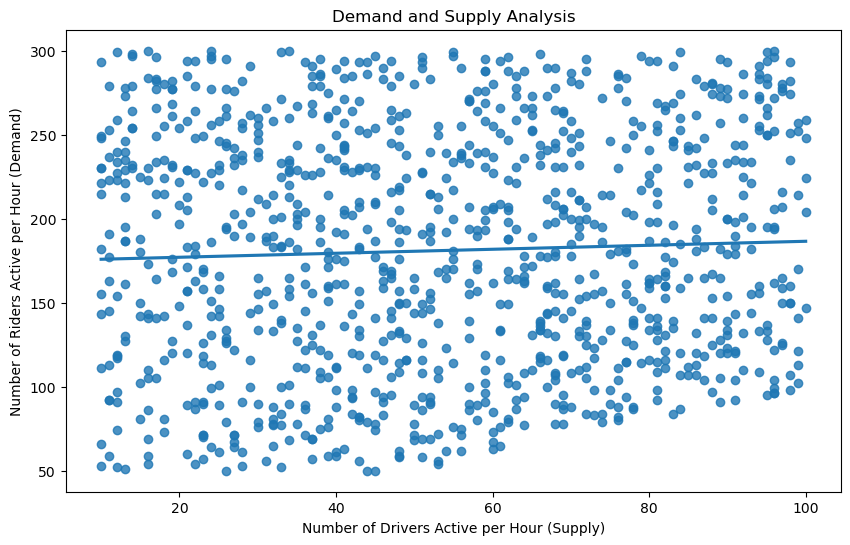

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Drivers Active Per Hour', y='Riders Active Per Hour', data=data, ci=None)

plt.title('Demand and Supply Analysis')
plt.xlabel('Number of Drivers Active per Hour (Supply)')
plt.ylabel('Number of Riders Active per Hour (Demand)')

plt.show()

In [10]:
# Calculate elasticity
avg_demand = data['Riders Active Per Hour'].mean()
avg_supply = data['Drivers Active Per Hour'].mean()
pct_change_demand = (max(data['Riders Active Per Hour']) - min(data['Riders Active Per Hour'])) / avg_demand * 100
pct_change_supply = (max(data['Drivers Active Per Hour']) - min(data['Drivers Active Per Hour'])) / avg_supply * 100
elasticity = pct_change_demand / pct_change_supply

print("Elasticity of demand with respect to the number of active drivers per hour: {:.2f}".format(elasticity))

Elasticity of demand with respect to the number of active drivers per hour: 0.82


In [16]:
# Calculate the supply ratio for each level of driver activity
data['Supply Ratio'] = data['Rides Completed'] / data['Drivers Active Per Hour']
data.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed,Supply Ratio
0,72,295,202.0,2.805556
1,50,78,43.0,0.860000
2,40,250,181.0,4.525000
3,78,140,124.0,1.589744
4,74,195,108.0,1.459459


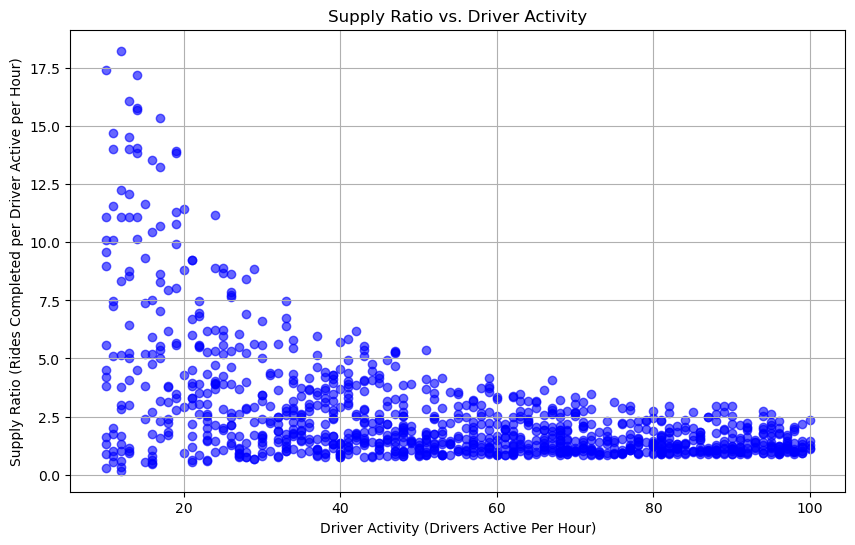

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Drivers Active Per Hour'], data['Supply Ratio'], c='blue', alpha=0.6)

plt.title('Supply Ratio vs. Driver Activity')
plt.xlabel('Driver Activity (Drivers Active Per Hour)')
plt.ylabel('Supply Ratio (Rides Completed per Driver Active per Hour)')
plt.grid(True)

plt.show()